<img src='./assets/images/gun_image_1.jpg'>

# Data Cleaning & EDA (II)

In this notebook, I will be cleaning extra datasets that complements the original gun violence datasets.

### Contents:
- Datasets
- Data Cleaning
    - Population
    - Provisions
    - Elections
    - Income
    - Registrations
- Casualties 
- Export Dataset

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from PIL import Image 
from wordcloud import WordCloud, STOPWORDS

plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

### Datasets

In [62]:
gun_df = pd.read_csv('./data/gun_violence_cleaned.csv')
population_df = pd.read_csv('./data/us_population.csv', parse_dates=True, index_col=0)
provisions_df = pd.read_csv('./data/provisions.csv', parse_dates=True)
elections_df = pd.read_csv('./data/election_results.csv')
income_df = pd.read_csv('./data/income.csv')
registrations_df = pd.read_csv('./data/registrations.csv')

In [63]:
gun_df.shape

(239399, 21)

In [64]:
pd.set_option('display.max_colwidth', 500, 'display.max_columns', 30)
gun_df.head()

,incident_id,date,state,city_or_county,n_killed,n_injured,congressional_district,latitude,longitude,state_house_district,state_senate_district,year,month,day,day_of_week,agegroup_child,agegroup_teen,agegroup_adult,agegroup_unknown,num_males,num_females
0,95289,2014-01-01,Michigan,Muskegon,0,0,2.0,43.2301,-86.2514,92.0,34.0,2014,Jan,1,Wed,0,0,1,0,0,1
1,92401,2014-01-01,New Jersey,Newark,0,0,10.0,40.7417,-74.1695,29.0,29.0,2014,Jan,1,Wed,0,0,0,1,0,0
2,92383,2014-01-01,New York,Queens,1,0,5.0,40.7034,-73.7474,33.0,14.0,2014,Jan,1,Wed,0,0,2,0,2,0
3,92142,2014-01-01,New York,Brooklyn,0,1,9.0,40.6715,-73.9476,43.0,20.0,2014,Jan,1,Wed,0,0,2,0,2,0
4,95261,2014-01-01,Missouri,Springfield,0,1,7.0,37.2646,-93.3007,131.0,30.0,2014,Jan,1,Wed,1,1,0,0,0,1


In [65]:
pd.set_option('display.max_colwidth', 500, 'display.max_columns', 30)
provisions_df.head()

,state,year,age18longgunpossess,age18longgunsale,age21handgunpossess,age21handgunsale,age21longgunpossess,age21longgunsale,age21longgunsaled,alcoholism,alctreatment,amm18,amm21h,ammbackground,ammlicense,...,threedaylimit,traffickingbackground,traffickingprohibited,traffickingprohibitedh,training,universal,universalh,universalpermit,universalpermith,violent,violenth,violentpartial,waiting,waitingh,lawtotal
0,Alabama,1991,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,15
1,Alaska,1991,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10
2,Arizona,1991,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12
3,Arkansas,1991,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15
4,California,1991,0,1,0,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,1,1,1,1,1,1,1,1,58


In [66]:
elections_df.head()

,state,year,democrat,republican
0,Alabama,2016,34.4,62.1
1,Alabama,2012,38.4,60.6
2,Alabama,2008,38.7,60.3
3,Alabama,2004,36.8,62.5
4,Alabama,2000,41.6,56.5


## Data Cleaning: Population

In [67]:
pd.set_option('display.max_colwidth', 500, 'display.max_columns', 30)
population_df.head()

,GEO.id2,GEO.display-label,rescen42010,resbase42010,respop72010,respop72011,respop72012,respop72013,respop72014,respop72015,respop72016,respop72017,respop72018,respop72019
GEO.id,,,,,,,,,,,,,,
Id,Id2,Geography,"April 1, 2010 - Census","April 1, 2010 - Estimates Base",Population Estimate (as of July 1) - 2010,Population Estimate (as of July 1) - 2011,Population Estimate (as of July 1) - 2012,Population Estimate (as of July 1) - 2013,Population Estimate (as of July 1) - 2014,Population Estimate (as of July 1) - 2015,Population Estimate (as of July 1) - 2016,Population Estimate (as of July 1) - 2017,Population Estimate (as of July 1) - 2018,Population Estimate (as of July 1) - 2019
0100000US,NaN,United States,308745538,308758105,309338421,311644280,313993272,316234505,318622525,321039839,323405935,325719178,326687501,328239523
0200000US1,1,Northeast Region,55317240,55318350,55388349,55642659,55860261,56047732,56203078,56296628,56359360,56470581,56046620,55982803
0200000US2,2,Midwest Region,66927001,66929794,66973360,67141501,67318295,67534451,67720120,67839187,67978168,68179351,68236628,68329004
0200000US3,3,South Region,114555744,114563024,114869241,116060993,117291728,118422269,119699966,121081238,122423457,123658624,124569433,125580448


In [68]:
population_df.columns

Index(['GEO.id2', 'GEO.display-label', 'rescen42010', 'resbase42010',
       'respop72010', 'respop72011', 'respop72012', 'respop72013',
       'respop72014', 'respop72015', 'respop72016', 'respop72017',
       'respop72018', 'respop72019'],
      dtype='object')

In [69]:
# Drop unnecessary columns
population_df.drop(['GEO.id2','rescen42010','resbase42010'], axis=1, inplace=True)
population_df.head(1)

,GEO.display-label,respop72010,respop72011,respop72012,respop72013,respop72014,respop72015,respop72016,respop72017,respop72018,respop72019
GEO.id,,,,,,,,,,,
Id,Geography,Population Estimate (as of July 1) - 2010,Population Estimate (as of July 1) - 2011,Population Estimate (as of July 1) - 2012,Population Estimate (as of July 1) - 2013,Population Estimate (as of July 1) - 2014,Population Estimate (as of July 1) - 2015,Population Estimate (as of July 1) - 2016,Population Estimate (as of July 1) - 2017,Population Estimate (as of July 1) - 2018,Population Estimate (as of July 1) - 2019


In [70]:
population_df.columns = ['geography', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']
population_df.head(10)

,geography,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
GEO.id,,,,,,,,,,,
Id,Geography,Population Estimate (as of July 1) - 2010,Population Estimate (as of July 1) - 2011,Population Estimate (as of July 1) - 2012,Population Estimate (as of July 1) - 2013,Population Estimate (as of July 1) - 2014,Population Estimate (as of July 1) - 2015,Population Estimate (as of July 1) - 2016,Population Estimate (as of July 1) - 2017,Population Estimate (as of July 1) - 2018,Population Estimate (as of July 1) - 2019
0100000US,United States,309338421,311644280,313993272,316234505,318622525,321039839,323405935,325719178,326687501,328239523
0200000US1,Northeast Region,55388349,55642659,55860261,56047732,56203078,56296628,56359360,56470581,56046620,55982803
0200000US2,Midwest Region,66973360,67141501,67318295,67534451,67720120,67839187,67978168,68179351,68236628,68329004
0200000US3,South Region,114869241,116060993,117291728,118422269,119699966,121081238,122423457,123658624,124569433,125580448
0200000US4,West Region,72107471,72799127,73522988,74230053,74999361,75822786,76644950,77410622,77834820,78347268
0400000US01,Alabama,4785579,4798649,4813946,4827660,4840037,4850858,4860545,4874747,4887681,4903185
0400000US02,Alaska,714015,722259,730825,736760,736759,737979,741522,739795,735139,731545
0400000US04,Arizona,6407002,6465488,6544211,6616124,6706435,6802262,6908642,7016270,7158024,7278717


In [71]:
# Set geography column as the index
population_df = population_df.set_index('geography')

# Filter for states only
population_df = population_df.loc['Alabama':, :].astype(int) 

In [72]:
population_df

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
geography,,,,,,,,,,
Alabama,4785579,4798649,4813946,4827660,4840037,4850858,4860545,4874747,4887681,4903185
Alaska,714015,722259,730825,736760,736759,737979,741522,739795,735139,731545
Arizona,6407002,6465488,6544211,6616124,6706435,6802262,6908642,7016270,7158024,7278717
Arkansas,2921737,2938640,2949208,2956780,2964800,2975626,2988231,3004279,3009733,3017804
California,37327690,37672654,38019006,38347383,38701278,39032444,39296476,39536653,39461588,39512223
Colorado,5048029,5116411,5186330,5262556,5342311,5440445,5530105,5607154,5691287,5758736
Connecticut,3580171,3591927,3597705,3602470,3600188,3593862,3587685,3588184,3571520,3565287
Delaware,899712,907884,916868,925114,934805,944107,952698,961939,965479,973764
District of Columbia,605040,620336,635630,650114,660797,672736,684336,693972,701547,705749


In [73]:
population_df.shape

(52, 10)

### Combine Population with Gun Violence Dataset 

In [74]:
# Filter gun_df from 2014-2017
pop_df = population_df.loc[:,['2014','2015','2016','2017','2018']]

In [75]:
# Add population data from population_df to gun_df
get_population = lambda x: pop_df.loc[x['state'], str(x['year'])]
gun_df['population'] = gun_df[['state', 'year']].apply(get_population, axis=1)

In [76]:
gun_df.head()

,incident_id,date,state,city_or_county,n_killed,n_injured,congressional_district,latitude,longitude,state_house_district,state_senate_district,year,month,day,day_of_week,agegroup_child,agegroup_teen,agegroup_adult,agegroup_unknown,num_males,num_females,population
0,95289,2014-01-01,Michigan,Muskegon,0,0,2.0,43.2301,-86.2514,92.0,34.0,2014,Jan,1,Wed,0,0,1,0,0,1,9914675
1,92401,2014-01-01,New Jersey,Newark,0,0,10.0,40.7417,-74.1695,29.0,29.0,2014,Jan,1,Wed,0,0,0,1,0,0,8943010
2,92383,2014-01-01,New York,Queens,1,0,5.0,40.7034,-73.7474,33.0,14.0,2014,Jan,1,Wed,0,0,2,0,2,0,19773580
3,92142,2014-01-01,New York,Brooklyn,0,1,9.0,40.6715,-73.9476,43.0,20.0,2014,Jan,1,Wed,0,0,2,0,2,0,19773580
4,95261,2014-01-01,Missouri,Springfield,0,1,7.0,37.2646,-93.3007,131.0,30.0,2014,Jan,1,Wed,1,1,0,0,0,1,6058014


In [77]:
# Reformat population data
population_df = population_df.stack().reset_index()
population_df.columns = ['state', 'year', 'population']
population_df['year'] = population_df['year'].astype(int)
population_df

,state,year,population
0,Alabama,2010,4785579
1,Alabama,2011,4798649
2,Alabama,2012,4813946
3,Alabama,2013,4827660
4,Alabama,2014,4840037
...,...,...,...
515,Puerto Rico,2015,3473177
516,Puerto Rico,2016,3406520
517,Puerto Rico,2017,3337177
518,Puerto Rico,2018,3193354


In [78]:
# Export cleaned dataset
population_df.to_csv('./data/population_cleaned.csv')

## Data Cleaning: Provisions

In [79]:
pd.set_option('display.max_colwidth', 500, 'display.max_columns', 30)
provisions_df.head()

,state,year,age18longgunpossess,age18longgunsale,age21handgunpossess,age21handgunsale,age21longgunpossess,age21longgunsale,age21longgunsaled,alcoholism,alctreatment,amm18,amm21h,ammbackground,ammlicense,...,threedaylimit,traffickingbackground,traffickingprohibited,traffickingprohibitedh,training,universal,universalh,universalpermit,universalpermith,violent,violenth,violentpartial,waiting,waitingh,lawtotal
0,Alabama,1991,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,15
1,Alaska,1991,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10
2,Arizona,1991,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12
3,Arkansas,1991,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15
4,California,1991,0,1,0,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,1,1,1,1,1,1,1,1,58


In [80]:
# Select relevant columns
provisions_df = provisions_df[['state', 'year', 'lawtotal']]
provisions_df

,state,year,lawtotal
0,Alabama,1991,15
1,Alaska,1991,10
2,Arizona,1991,12
3,Arkansas,1991,15
4,California,1991,58
...,...,...,...
1345,Virginia,2017,13
1346,Washington,2017,43
1347,West Virginia,2017,21
1348,Wisconsin,2017,23


In [81]:
provisions_df.describe()

,year,lawtotal
count,1350.000000,1350.000000
mean,2004.000000,23.452593
std,7.791767,21.677371
min,1991.000000,3.000000
25%,1997.000000,10.000000
50%,2004.000000,15.000000
75%,2011.000000,25.000000
max,2017.000000,106.000000


In [82]:
provisions_df.sort_values(by='lawtotal', ascending=False).head(20)

,state,year,lawtotal
1304,California,2017,106
1254,California,2016,104
1204,California,2015,102
1120,Massachusetts,2013,100
470,Massachusetts,2000,100
720,Massachusetts,2005,100
970,Massachusetts,2010,100
1154,California,2014,100
870,Massachusetts,2008,100
1270,Massachusetts,2016,100


In [83]:
provisions_df.sort_values(by='lawtotal', ascending=False).tail(20)

,state,year,lawtotal
344,Vermont,1997,3
94,Vermont,1992,3
1194,Vermont,2014,3
394,Vermont,1998,3
444,Vermont,1999,3
294,Vermont,1996,3
494,Vermont,2000,3
244,Vermont,1995,3
544,Vermont,2001,3
594,Vermont,2002,3


### Combine Provisions with Gun Violence Dataset 

In [84]:
# Filter gun_df from 2014-2017
gun_df = gun_df[gun_df['year'] < 2018]

In [85]:
gun_df.shape

(225597, 22)

In [86]:
gun_df = pd.merge(gun_df, provisions_df, on=['state', 'year'], how='left')

In [87]:
gun_df.head()

,incident_id,date,state,city_or_county,n_killed,n_injured,congressional_district,latitude,longitude,state_house_district,state_senate_district,year,month,day,day_of_week,agegroup_child,agegroup_teen,agegroup_adult,agegroup_unknown,num_males,num_females,population,lawtotal
0,95289,2014-01-01,Michigan,Muskegon,0,0,2.0,43.2301,-86.2514,92.0,34.0,2014,Jan,1,Wed,0,0,1,0,0,1,9914675,20.0
1,92401,2014-01-01,New Jersey,Newark,0,0,10.0,40.7417,-74.1695,29.0,29.0,2014,Jan,1,Wed,0,0,0,1,0,0,8943010,67.0
2,92383,2014-01-01,New York,Queens,1,0,5.0,40.7034,-73.7474,33.0,14.0,2014,Jan,1,Wed,0,0,2,0,2,0,19773580,75.0
3,92142,2014-01-01,New York,Brooklyn,0,1,9.0,40.6715,-73.9476,43.0,20.0,2014,Jan,1,Wed,0,0,2,0,2,0,19773580,75.0
4,95261,2014-01-01,Missouri,Springfield,0,1,7.0,37.2646,-93.3007,131.0,30.0,2014,Jan,1,Wed,1,1,0,0,0,1,6058014,8.0


In [88]:
gun_df.shape

(225597, 23)

## Data Cleaning: Elections

In [89]:
elections_df.head()

,state,year,democrat,republican
0,Alabama,2016,34.4,62.1
1,Alabama,2012,38.4,60.6
2,Alabama,2008,38.7,60.3
3,Alabama,2004,36.8,62.5
4,Alabama,2000,41.6,56.5


In [90]:
# Because elections are every 4 years, I'll use the results from the election years for the next 3 non-election years

election = []
for i in range(4):
    temp_df = elections_df.copy()
    temp_df['year'] = elections_df['year'] + i
    election.append(temp_df)

elections_df = pd.concat(election)

In [91]:
# Check entries 
elections_df[elections_df['state'] == 'Alabama'].sort_values(by='year')

,state,year,democrat,republican
4,Alabama,2000,41.6,56.5
4,Alabama,2001,41.6,56.5
4,Alabama,2002,41.6,56.5
4,Alabama,2003,41.6,56.5
3,Alabama,2004,36.8,62.5
3,Alabama,2005,36.8,62.5
3,Alabama,2006,36.8,62.5
3,Alabama,2007,36.8,62.5
2,Alabama,2008,38.7,60.3
2,Alabama,2009,38.7,60.3


In [92]:
elections_df

,state,year,democrat,republican
0,Alabama,2016,34.4,62.1
1,Alabama,2012,38.4,60.6
2,Alabama,2008,38.7,60.3
3,Alabama,2004,36.8,62.5
4,Alabama,2000,41.6,56.5
...,...,...,...,...
250,Wyoming,2019,21.6,67.4
251,Wyoming,2015,27.8,68.6
252,Wyoming,2011,32.5,64.8
253,Wyoming,2007,29.1,69.0


In [93]:
elections_df['political'] = elections_df['democrat'] - elections_df['republican']
elections_df['political'] = ['democrat' if x > 0 else 'republican' for x in elections_df['political']]

In [94]:
elections_df.head()

,state,year,democrat,republican,political
0,Alabama,2016,34.4,62.1,republican
1,Alabama,2012,38.4,60.6,republican
2,Alabama,2008,38.7,60.3,republican
3,Alabama,2004,36.8,62.5,republican
4,Alabama,2000,41.6,56.5,republican


### Combine Elections with Gun Violence Dataset 

In [95]:
gun_df.shape

(225597, 23)

In [96]:
gun_df = pd.merge(gun_df, elections_df, on=['state', 'year'], how='left')
gun_df.head()

,incident_id,date,state,city_or_county,n_killed,n_injured,congressional_district,latitude,longitude,state_house_district,state_senate_district,year,month,day,day_of_week,agegroup_child,agegroup_teen,agegroup_adult,agegroup_unknown,num_males,num_females,population,lawtotal,democrat,republican,political
0,95289,2014-01-01,Michigan,Muskegon,0,0,2.0,43.2301,-86.2514,92.0,34.0,2014,Jan,1,Wed,0,0,1,0,0,1,9914675,20.0,54.2,44.7,democrat
1,92401,2014-01-01,New Jersey,Newark,0,0,10.0,40.7417,-74.1695,29.0,29.0,2014,Jan,1,Wed,0,0,0,1,0,0,8943010,67.0,58.3,40.5,democrat
2,92383,2014-01-01,New York,Queens,1,0,5.0,40.7034,-73.7474,33.0,14.0,2014,Jan,1,Wed,0,0,2,0,2,0,19773580,75.0,63.3,35.2,democrat
3,92142,2014-01-01,New York,Brooklyn,0,1,9.0,40.6715,-73.9476,43.0,20.0,2014,Jan,1,Wed,0,0,2,0,2,0,19773580,75.0,63.3,35.2,democrat
4,95261,2014-01-01,Missouri,Springfield,0,1,7.0,37.2646,-93.3007,131.0,30.0,2014,Jan,1,Wed,1,1,0,0,0,1,6058014,8.0,44.4,53.8,republican


In [97]:
gun_df.shape

(225597, 26)

## Data Cleaning: Income

In [102]:
income_df = pd.read_csv('./data/income.csv')

In [103]:
income_df.head()

,state,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Alabama,32685,33696,34717,35497,35792,36903,38238,38918,39976
1,Alaska,46834,48614,51438,52667,51463,54621,56507,55674,56042
2,Arizona,33746,33565,34930,36096,36605,38127,39731,40546,41633
3,Arkansas,31372,31801,33790,36167,36007,38007,39060,39722,40791
4,California,42224,43323,45854,48359,48555,51317,54664,56308,58272


In [104]:
# Stack columns to State, Year, Income to merge with gun_df
income_df = income_df.set_index('state').stack().reset_index()
income_df.columns = ['state', 'year', 'income']
income_df['year'] = income_df['year'].astype(int)

### Combine Income with Gun Violence Dataset 

In [106]:
gun_df = pd.merge(gun_df, income_df, on=['state', 'year'], how='left')
gun_df.head()

,incident_id,date,state,city_or_county,n_killed,n_injured,congressional_district,latitude,longitude,state_house_district,state_senate_district,year,month,day,day_of_week,agegroup_child,agegroup_teen,agegroup_adult,agegroup_unknown,num_males,num_females,population,lawtotal,democrat,republican,political,income
0,95289,2014-01-01,Michigan,Muskegon,0,0,2.0,43.2301,-86.2514,92.0,34.0,2014,Jan,1,Wed,0,0,1,0,0,1,9914675,20.0,54.2,44.7,democrat,40835
1,92401,2014-01-01,New Jersey,Newark,0,0,10.0,40.7417,-74.1695,29.0,29.0,2014,Jan,1,Wed,0,0,0,1,0,0,8943010,67.0,58.3,40.5,democrat,57518
2,92383,2014-01-01,New York,Queens,1,0,5.0,40.7034,-73.7474,33.0,14.0,2014,Jan,1,Wed,0,0,2,0,2,0,19773580,75.0,63.3,35.2,democrat,56111
3,92142,2014-01-01,New York,Brooklyn,0,1,9.0,40.6715,-73.9476,43.0,20.0,2014,Jan,1,Wed,0,0,2,0,2,0,19773580,75.0,63.3,35.2,democrat,56111
4,95261,2014-01-01,Missouri,Springfield,0,1,7.0,37.2646,-93.3007,131.0,30.0,2014,Jan,1,Wed,1,1,0,0,0,1,6058014,8.0,44.4,53.8,republican,41141


## Data Cleaning: Registrations

In [107]:
registrations_df.head()

,year,state,other_weapon,destructive_device,machinegun,silencer,short_barreled_rifle,short_barreled_shotgun,total_weapons
0,2017,Alabama,1203,78434,26307,48118,5285,2294,161641
1,2017,Alaska,327,4722,1650,6040,1783,1302,15824
2,2017,Arkansas,620,49499,5319,19979,3266,1158,79841
3,2017,Arizona,1277,105067,16874,40485,13695,2340,179738
4,2017,California,3932,272128,29047,15044,10796,13675,344622


In [108]:
# Keeping Year, State and Total Weapons
registrations_df = registrations_df[['year', 'state', 'total_weapons']]

### Combine Registrations with Gun Violence Dataset 

In [112]:
gun_df = pd.merge(gun_df, registrations_df, on=['state', 'year'], how='left')
gun_df.head()

,incident_id,date,state,city_or_county,n_killed,n_injured,congressional_district,latitude,longitude,state_house_district,state_senate_district,year,month,day,day_of_week,agegroup_child,agegroup_teen,agegroup_adult,agegroup_unknown,num_males,num_females,population,lawtotal,democrat,republican,political,income,total_weapons
0,95289,2014-01-01,Michigan,Muskegon,0,0,2.0,43.2301,-86.2514,92.0,34.0,2014,Jan,1,Wed,0,0,1,0,0,1,9914675,20.0,54.2,44.7,democrat,40835,42855
1,92401,2014-01-01,New Jersey,Newark,0,0,10.0,40.7417,-74.1695,29.0,29.0,2014,Jan,1,Wed,0,0,0,1,0,0,8943010,67.0,58.3,40.5,democrat,57518,51670
2,92383,2014-01-01,New York,Queens,1,0,5.0,40.7034,-73.7474,33.0,14.0,2014,Jan,1,Wed,0,0,2,0,2,0,19773580,75.0,63.3,35.2,democrat,56111,64353
3,92142,2014-01-01,New York,Brooklyn,0,1,9.0,40.6715,-73.9476,43.0,20.0,2014,Jan,1,Wed,0,0,2,0,2,0,19773580,75.0,63.3,35.2,democrat,56111,64353
4,95261,2014-01-01,Missouri,Springfield,0,1,7.0,37.2646,-93.3007,131.0,30.0,2014,Jan,1,Wed,1,1,0,0,0,1,6058014,8.0,44.4,53.8,republican,41141,51550


In [113]:
# Create new column for total weapons per population
gun_df['total_weapons_norm'] = gun_df['total_weapons'] / gun_df['population']
gun_df.head()

,incident_id,date,state,city_or_county,n_killed,n_injured,congressional_district,latitude,longitude,state_house_district,state_senate_district,year,month,day,day_of_week,agegroup_child,agegroup_teen,agegroup_adult,agegroup_unknown,num_males,num_females,population,lawtotal,democrat,republican,political,income,total_weapons,total_weapons_norm
0,95289,2014-01-01,Michigan,Muskegon,0,0,2.0,43.2301,-86.2514,92.0,34.0,2014,Jan,1,Wed,0,0,1,0,0,1,9914675,20.0,54.2,44.7,democrat,40835,42855,0.004322
1,92401,2014-01-01,New Jersey,Newark,0,0,10.0,40.7417,-74.1695,29.0,29.0,2014,Jan,1,Wed,0,0,0,1,0,0,8943010,67.0,58.3,40.5,democrat,57518,51670,0.005778
2,92383,2014-01-01,New York,Queens,1,0,5.0,40.7034,-73.7474,33.0,14.0,2014,Jan,1,Wed,0,0,2,0,2,0,19773580,75.0,63.3,35.2,democrat,56111,64353,0.003254
3,92142,2014-01-01,New York,Brooklyn,0,1,9.0,40.6715,-73.9476,43.0,20.0,2014,Jan,1,Wed,0,0,2,0,2,0,19773580,75.0,63.3,35.2,democrat,56111,64353,0.003254
4,95261,2014-01-01,Missouri,Springfield,0,1,7.0,37.2646,-93.3007,131.0,30.0,2014,Jan,1,Wed,1,1,0,0,0,1,6058014,8.0,44.4,53.8,republican,41141,51550,0.008509


## Casualties Feature

In [115]:
gun_df.drop('agegroup_unknown', axis=1, inplace=True)

In [116]:
gun_df['n_casualties'] = gun_df['n_injured'] + gun_df['n_killed']
gun_df['n_casualties'].value_counts()

1      109787
0       91317
2       18688
3        4039
4        1137
5         356
6         116
7          70
8          33
9          18
12          9
10          7
11          3
15          3
17          2
18          2
14          1
13          1
47          1
19          1
20          1
21          1
25          1
27          1
35          1
103         1
Name: n_casualties, dtype: int64

In [117]:
gun_df['casualties'] = [1 if i > 0 else 0 for i in gun_df['n_casualties']]
gun_df.head()

,incident_id,date,state,city_or_county,n_killed,n_injured,congressional_district,latitude,longitude,state_house_district,state_senate_district,year,month,day,day_of_week,agegroup_child,agegroup_teen,agegroup_adult,num_males,num_females,population,lawtotal,democrat,republican,political,income,total_weapons,total_weapons_norm,n_casualties,casualties
0,95289,2014-01-01,Michigan,Muskegon,0,0,2.0,43.2301,-86.2514,92.0,34.0,2014,Jan,1,Wed,0,0,1,0,1,9914675,20.0,54.2,44.7,democrat,40835,42855,0.004322,0,0
1,92401,2014-01-01,New Jersey,Newark,0,0,10.0,40.7417,-74.1695,29.0,29.0,2014,Jan,1,Wed,0,0,0,0,0,8943010,67.0,58.3,40.5,democrat,57518,51670,0.005778,0,0
2,92383,2014-01-01,New York,Queens,1,0,5.0,40.7034,-73.7474,33.0,14.0,2014,Jan,1,Wed,0,0,2,2,0,19773580,75.0,63.3,35.2,democrat,56111,64353,0.003254,1,1
3,92142,2014-01-01,New York,Brooklyn,0,1,9.0,40.6715,-73.9476,43.0,20.0,2014,Jan,1,Wed,0,0,2,2,0,19773580,75.0,63.3,35.2,democrat,56111,64353,0.003254,1,1
4,95261,2014-01-01,Missouri,Springfield,0,1,7.0,37.2646,-93.3007,131.0,30.0,2014,Jan,1,Wed,1,1,0,0,1,6058014,8.0,44.4,53.8,republican,41141,51550,0.008509,1,1


### Incidents with most casualties

In [119]:
gun_df.sort_values(by='n_casualties', ascending=False).head(10)

,incident_id,date,state,city_or_county,n_killed,n_injured,congressional_district,latitude,longitude,state_house_district,state_senate_district,year,month,day,day_of_week,agegroup_child,agegroup_teen,agegroup_adult,num_males,num_females,population,lawtotal,democrat,republican,political,income,total_weapons,total_weapons_norm,n_casualties,casualties
130170,577157,2016-06-12,Florida,Orlando,50,53,5.0,28.5195,-81.3767,47.0,12.0,2016,Jun,12,Sun,0,0,103,61,17,20656589,21.0,47.8,49.0,republican,45855,277227,0.013421,103,1
216873,980577,2017-11-05,Texas,Sutherland Springs,27,20,28.0,29.2733,-98.0564,44.0,21.0,2017,Nov,5,Sun,11,3,29,19,23,28304596,18.0,43.2,52.2,republican,46942,588696,0.020799,47,1
101253,456893,2015-12-02,California,San Bernardino,16,19,31.0,34.0758,-117.2770,40.0,23.0,2015,Dec,2,Wed,0,0,33,12,11,39032444,102.0,60.2,37.1,democrat,54664,312264,0.008000,35,1
70233,341622,2015-05-17,Texas,Waco,9,18,17.0,31.5039,-97.1290,NaN,22.0,2015,May,17,Sun,0,0,9,9,0,27454880,20.0,41.4,57.2,republican,46787,403185,0.014685,27,1
195567,879953,2017-07-01,Arkansas,Little Rock,0,25,2.0,34.7434,-92.2727,33.0,32.0,2017,Jul,1,Sat,0,1,25,16,7,3004279,11.0,33.7,60.6,republican,40791,79841,0.026576,25,1
137050,611479,2016-07-25,Florida,Fort Myers,2,19,19.0,26.6120,-81.8600,78.0,30.0,2016,Jul,25,Mon,0,8,12,13,7,20656589,21.0,47.8,49.0,republican,45855,277227,0.013421,21,1
11288,121031,2014-04-02,Texas,Fort Hood,4,16,25.0,31.1330,-97.7944,59.0,24.0,2014,Apr,2,Wed,0,0,20,6,0,26954436,20.0,41.4,57.2,republican,45861,337309,0.012514,20,1
92346,423223,2015-10-01,Oregon,Roseburg,10,9,4.0,43.2628,-123.2800,7.0,4.0,2015,Oct,1,Thu,0,2,15,7,8,4016537,33.0,54.2,42.2,democrat,44424,48751,0.012138,19,1
113323,511436,2016-02-25,Kansas,Hesston,4,14,4.0,38.1368,-97.4268,74.0,31.0,2016,Feb,25,Thu,0,0,18,5,1,2907731,7.0,36.1,56.7,republican,47221,37908,0.013037,18,1
218302,987611,2017-11-14,California,Corning,6,12,1.0,40.0187,-122.3930,3.0,4.0,2017,Nov,14,Tue,6,0,12,11,4,39536653,106.0,61.7,31.6,democrat,58272,344622,0.008717,18,1


### States x Number of casualties

In [184]:
df_casualties = gun_df.groupby('state')['n_casualties'].count()

In [185]:
# Create df for casualty rate
df_casualties = pd.DataFrame(df_casualties)
df_casualties = df_casualties.reset_index()
df_casualties = df_casualties.sort_values(by='n_casualties',ascending=False)
df_casualties.head()

,state,n_casualties
13,Illinois,16695
4,California,15171
9,Florida,14197
43,Texas,12890
35,Ohio,9643


### State x Casualty rate

In [139]:
casualty_rate = gun_df.groupby('state')['casualties'].sum() / gun_df.groupby('state')['casualties'].count()
casualty_rate.sort_values(ascending=False).head(10)

state
Illinois        0.773944
Arizona         0.722554
Alabama         0.715736
Nevada          0.709239
Maryland        0.702508
Mississippi     0.681600
Virginia        0.676283
Pennsylvania    0.670985
Tennessee       0.664687
Missouri        0.663043
Name: casualties, dtype: float64

In [157]:
# Create df for casualty rate
df_casualty_rate = pd.DataFrame(casualty_rate)
df_casualty_rate = df_casualty_rate.reset_index()
df_casualty_rate.rename(columns = {'state':'state',
                                  'casualties':'casualty_rate'},
                       inplace=True)
df_casualty_rate = df_casualty_rate.sort_values(by='casualty_rate',ascending=False)
df_casualty_rate.head()

,state,casualty_rate
13,Illinois,0.773944
2,Arizona,0.722554
0,Alabama,0.715736
28,Nevada,0.709239
20,Maryland,0.702508


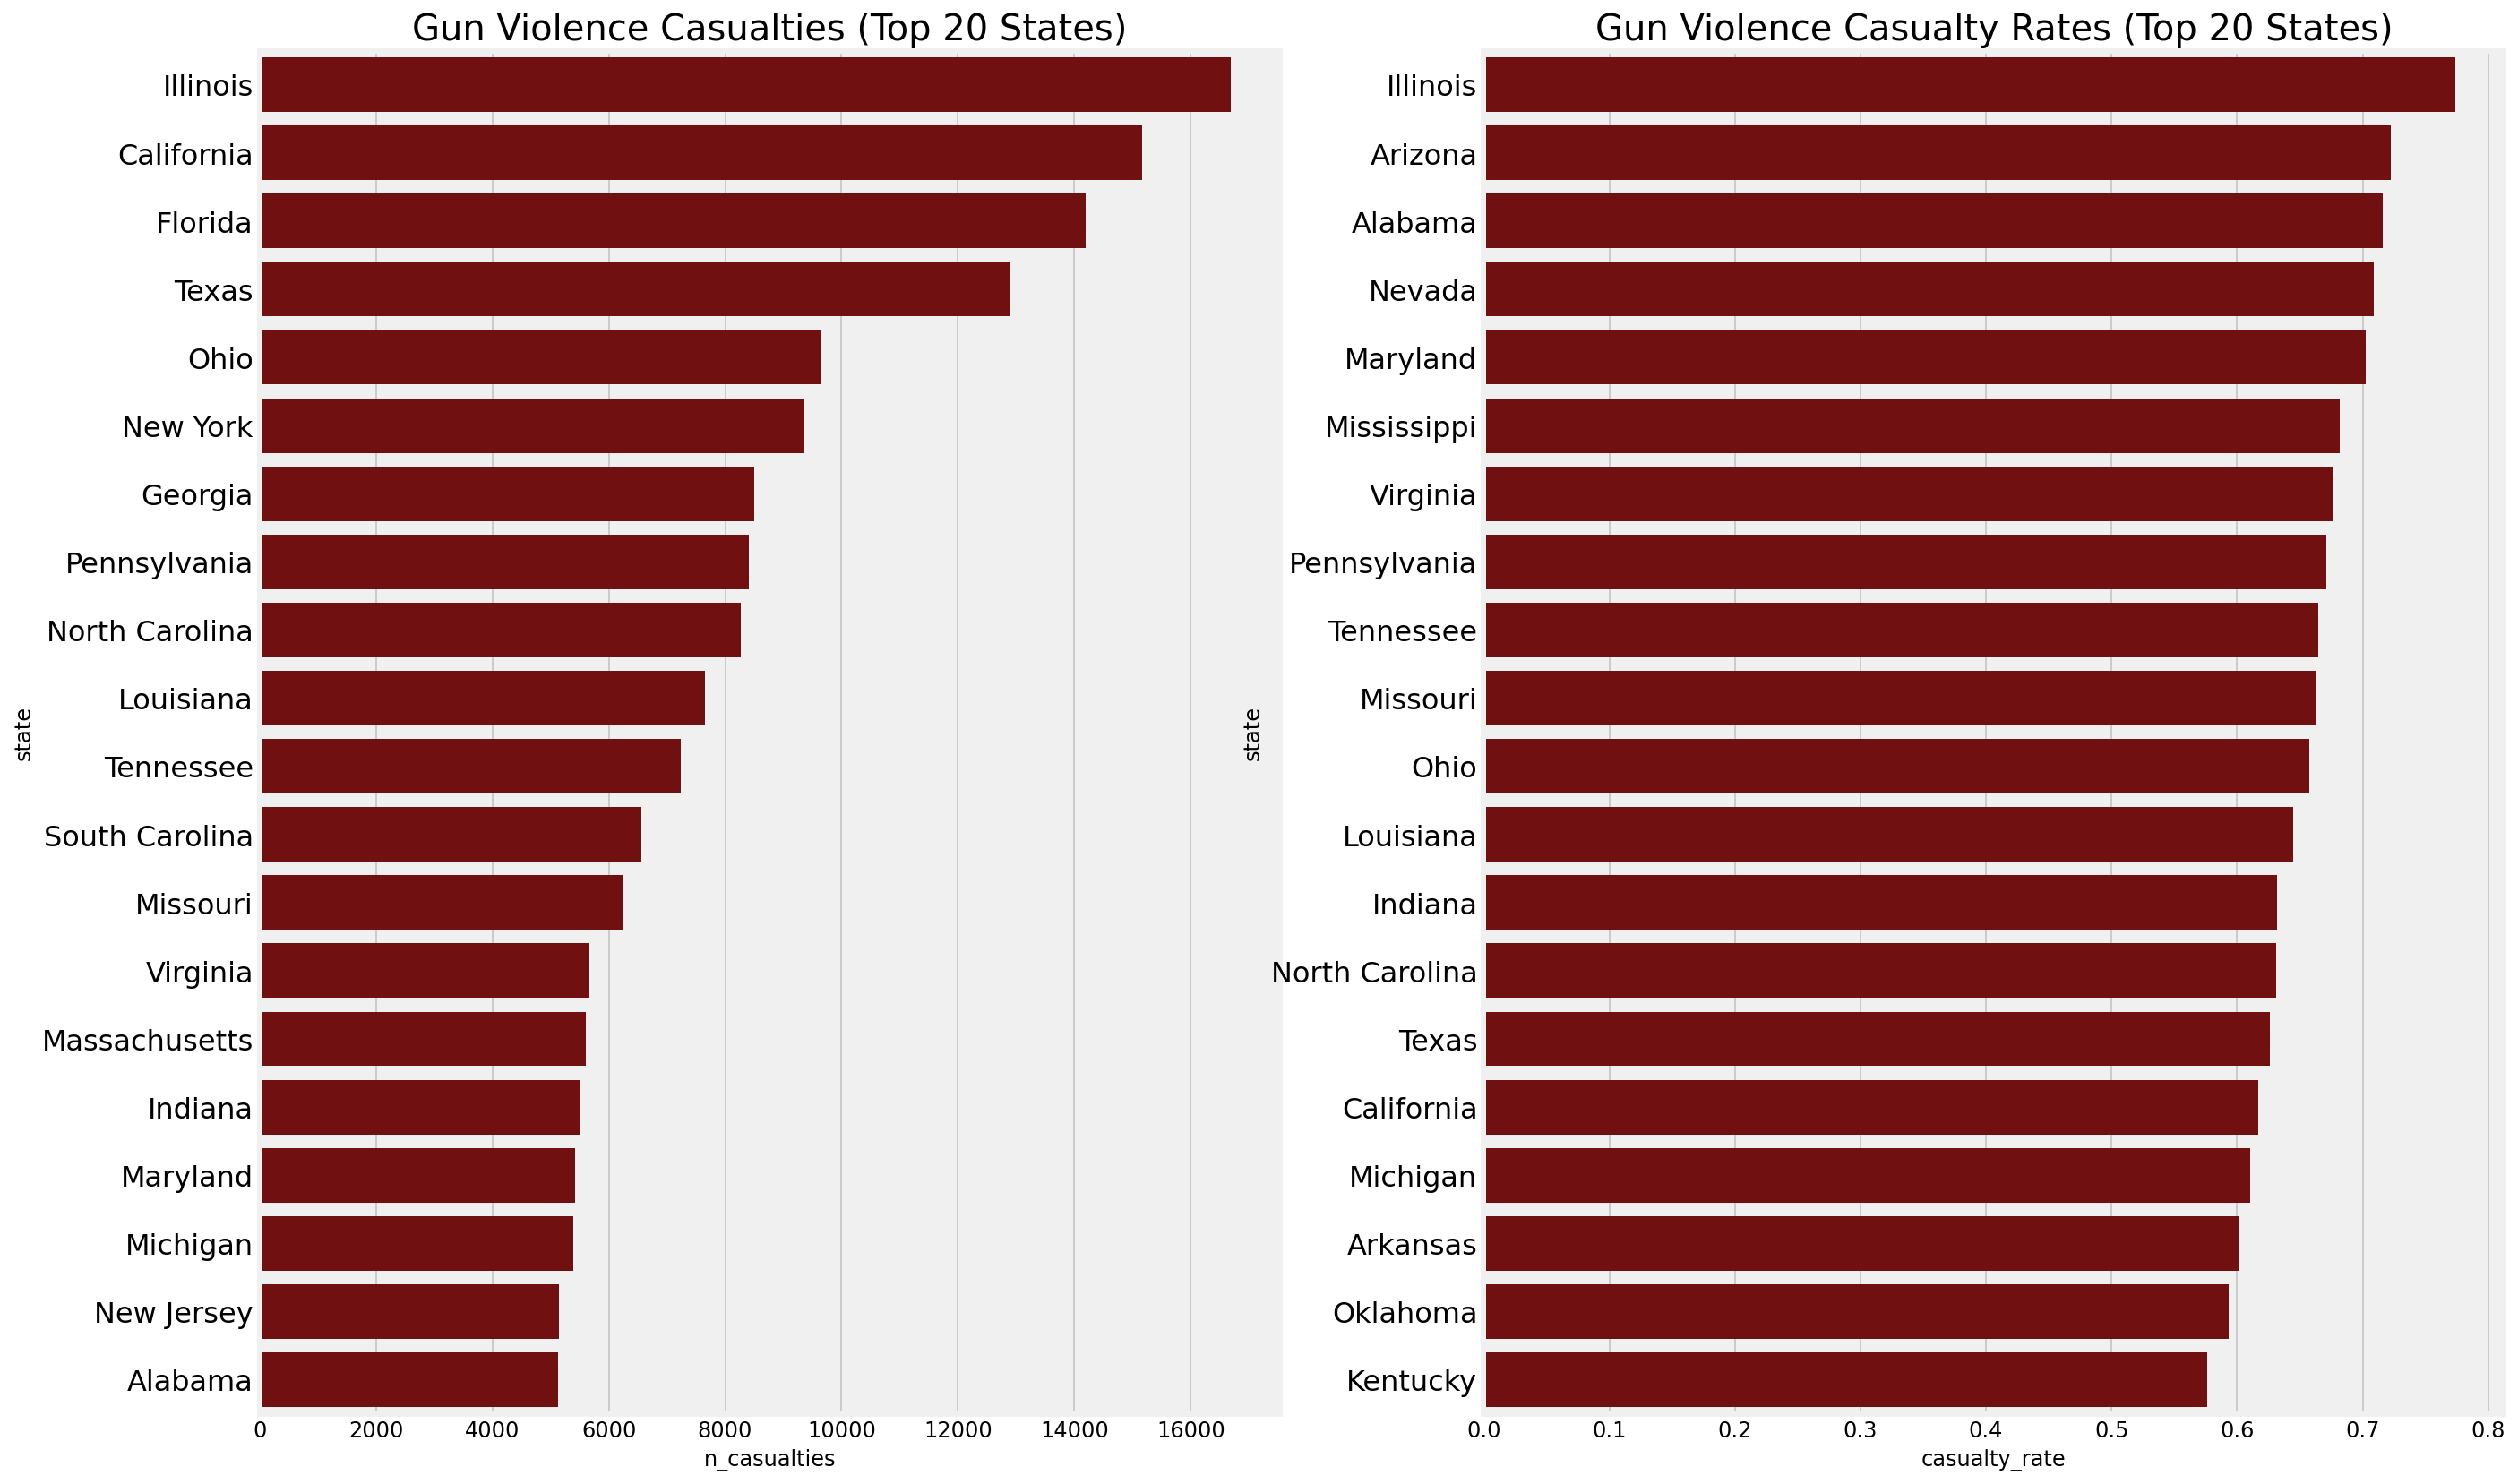

In [203]:
plt.subplots(figsize=(20,14))

ax1 = plt.subplot(1,2,1)
sns.barplot(x='n_casualties', y='state', data=df_casualties.head(20), color='maroon')
plt.xticks(size=12)
plt.yticks(size=16)
plt.title('Gun Violence Casualties (Top 20 States)', size=20)

ax2 = plt.subplot(1,2,2)
sns.barplot(x='casualty_rate', y='state', data=df_casualty_rate.head(20), color='maroon')
plt.xticks(size=12)
plt.yticks(size=16)
plt.title('Gun Violence Casualty Rates (Top 20 States)', size=20);

## Export Combined Dataset

In [122]:
gun_df.to_csv('./data/combined.csv', index=False)